In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mnist
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist
#from keras.utils import plot_model
import pydot
import pydotplus
from pydotplus import graphviz
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot
from sklearn.metrics import confusion_matrix

In [2]:
# загружаем данные
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print(train_images.shape)  # (60000, 28, 28) ('unit,str,columns')
print(train_labels.shape)  # (60000,)
print(test_images.shape)   # (10000, 28, 28) ('unit,str,columns')
print(test_labels.shape)   # (10000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
train_images[0,0:20,0:7]

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   4,   6,   7,   2],
       [  0,   3,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  18,  44,  82],
       [  0,  57, 187, 208, 224, 221, 224],
       [  3, 202, 228, 224, 221, 211, 211],
       [ 98, 233, 198, 210, 222, 229, 229]], dtype=uint8)

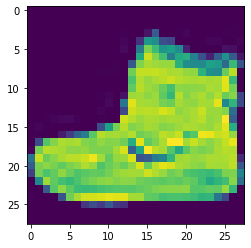

In [5]:
plt.imshow(train_images[0,:,:])
plt.show()

In [6]:
# Normalize the images.
train_images = (train_images / 127) - 1
test_images = (test_images / 127) - 1

In [7]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [8]:
print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [9]:
train_images[0:10,0:5]

array([[-1.        , -1.        , -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -0.99212598],
       [-1.        , -1.        , -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ]])

In [34]:
model_fashion = Sequential(name='model_fashion')
model_fashion.add(Dense(128, activation='relu', input_shape=(784,)))
model_fashion.add(Dense(10, activation='softmax'))

In [35]:
model_fashion.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [36]:
model_fashion.summary()

Model: "model_fashion"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


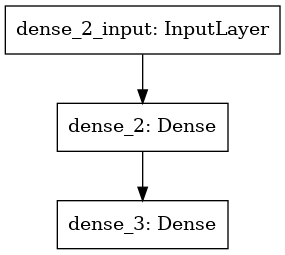

In [37]:
plot_model(model_fashion, to_file='model.png')

In [38]:
#model_fashion.get_config()

In [10]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [11]:
train_labels.shape

(60000,)

In [12]:
y_train.shape

(60000, 10)

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
# Train the model.
hist = model_fashion.fit(
  train_images,
  y_train,
  epochs=25,
  batch_size=32, validation_split=0.2
)

Epoch 1/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6246 - accuracy: 0.7794 - val_loss: 0.4219 - val_accuracy: 0.8460
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3942 - accuracy: 0.8561 - val_loss: 0.3866 - val_accuracy: 0.8608
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3411 - accuracy: 0.8743 - val_loss: 0.3708 - val_accuracy: 0.8690
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3163 - accuracy: 0.8830 - val_loss: 0.3915 - val_accuracy: 0.8581
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2976 - accuracy: 0.8919 - val_loss: 0.3871 - val_accuracy: 0.8637
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2885 - accuracy: 0.8912 - val_loss: 0.3434 - val_accuracy: 0.8761
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2751 - accuracy: 0.8969 - val_loss: 0.3627 - val_accuracy:

In [45]:
# Evaluate the model.
model_fashion.evaluate(
  test_images,
  y_test
)

313/313 [==============================] - 1s 2ms/step - loss: 0.4298 - accuracy: 0.8790


[0.429790198802948, 0.8790000081062317]

In [22]:
# Predict on the first 5 test images.
predictions = model_fashion.predict(test_images[:5])

In [23]:
# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [9 2 1 1 6]

[9 2 1 1 0]


In [24]:
# Check our predictions against the ground truths.
print(test_labels[:5]) # [9 2 1 1 6]]

[9 2 1 1 6]


In [31]:
predictions

array([[2.97996872e-09, 8.04328053e-08, 2.91362937e-07, 2.31134099e-08,
        1.95031191e-09, 1.34335486e-02, 8.59477677e-06, 1.65675245e-02,
        3.64936432e-06, 9.69986260e-01],
       [2.61014208e-07, 5.01682300e-14, 9.99065340e-01, 1.47177455e-18,
        9.34075215e-04, 1.56511969e-17, 3.13332379e-07, 1.90871177e-19,
        1.47681380e-14, 1.08195664e-19],
       [3.55558846e-11, 1.00000000e+00, 3.21619745e-11, 4.70936734e-10,
        6.86453294e-09, 8.64061817e-17, 4.25689484e-11, 5.08442752e-23,
        4.52163272e-11, 1.87640793e-17],
       [2.99804903e-10, 9.99999642e-01, 8.58487031e-11, 4.13261745e-07,
        5.19038608e-08, 2.00426915e-12, 7.26963689e-09, 5.60291905e-18,
        4.87630214e-10, 3.61292967e-15],
       [1.40148208e-01, 4.36710116e-06, 2.86622960e-02, 8.80530383e-03,
        4.51516248e-02, 4.70780979e-05, 7.76953936e-01, 8.92541323e-07,
        2.23067793e-04, 3.21613311e-06]], dtype=float32)

In [32]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [33]:
# Save the model to disk.
model_fashion.save_weights('model_fashion.h5')

# Load the model from disk later using:
# model.load_weights('model_fashion.h5')

In [42]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [47]:
#hist.history

In [ ]:
# Модель            loss     accuracy    val_loss    val_accuracy   test_loss    test_accuracy
#
# 2 слоя           0.1564     0.9429      0.4098        0.8832        0.4298       0.8790
# 3 слоя           0.1431     0.9478      0.4064        0.8864        0.4501       0.8807  
# 5 слоев          0.1558     0.9404      0.4435        0.8840        0.4828       0.8756
# 10 слоев adam    0.2095     0.9223      0.3703        0.8864        0.3855       0.8805
# 10 SGD           0.2056     0.9231      0.3391        0.8839        0.3632       0.8766
# 10 RMSProp       2.8515     0.2278      2.1571        0.1553        2.1959       0.1578
#
#
#
#
#
#

In [98]:
model_fashion_5 = Sequential(name='model_fashion_5')
model_fashion_5.add(Dense(64, activation='relu', input_shape=(784,)))
model_fashion_5.add(Dense(128, activation='relu'))
model_fashion_5.add(Dense(256, activation='relu'))
model_fashion_5.add(Dense(64, activation='relu'))
model_fashion_5.add(Dense(10, activation='softmax'))

In [99]:
model_fashion_5.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [100]:
model_fashion_5.summary()

Model: "model_fashion_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_75 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_76 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_77 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_78 (Dense)             (None, 10)                650       
Total params: 108,682
Trainable params: 108,682
Non-trainable params: 0
_________________________________________________________________


In [101]:
# Train the model.
hist = model_fashion_5.fit(
  train_images,
  y_train,
  epochs=25,
  batch_size=32, validation_split=0.2
)

Epoch 1/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6650 - accuracy: 0.7575 - val_loss: 0.4515 - val_accuracy: 0.8344
Epoch 2/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4083 - accuracy: 0.8497 - val_loss: 0.4170 - val_accuracy: 0.8507
Epoch 3/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3559 - accuracy: 0.8686 - val_loss: 0.3935 - val_accuracy: 0.8540
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3335 - accuracy: 0.8748 - val_loss: 0.3760 - val_accuracy: 0.8547
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3088 - accuracy: 0.8851 - val_loss: 0.3577 - val_accuracy: 0.8705
Epoch 6/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2976 - accuracy: 0.8894 - val_loss: 0.3561 - val_accuracy: 0.8728
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2771 - accuracy: 0.8943 - val_loss: 0.3568 - val_accuracy:

In [102]:
# Evaluate the model.
model_fashion_5.evaluate(
  test_images,
  y_test
)

313/313 [==============================] - 1s 2ms/step - loss: 0.4828 - accuracy: 0.8756


[0.48278799653053284, 0.8755999803543091]

In [15]:
model_fashion_10 = Sequential(name='model_fashion_10')
model_fashion_10.add(Dense(64, activation='relu', input_shape=(784,)))
model_fashion_10.add(Dense(128, activation='relu'))
model_fashion_10.add(Dense(128, activation='relu'))
model_fashion_10.add(Dense(64, activation='relu'))
model_fashion_10.add(Dense(64, activation='relu'))
model_fashion_10.add(Dense(64, activation='relu'))
model_fashion_10.add(Dense(64, activation='relu'))
model_fashion_10.add(Dense(64, activation='relu'))
model_fashion_10.add(Dense(64, activation='relu'))
model_fashion_10.add(Dense(10, activation='softmax'))

In [16]:
model_fashion_10.compile(
  optimizer='Adam',                     # SGD, Adam, RMSProp
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [17]:
model_fashion_10.summary()

Model: "model_fashion_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)           

In [18]:
# Train the model.
hist = model_fashion_10.fit(
  train_images,
  y_train,
  epochs=25,
  batch_size=32, validation_split=0.2
)

Epoch 1/25
1500/1500 [==============================] - 9s 5ms/step - loss: 0.7932 - accuracy: 0.7020 - val_loss: 0.4511 - val_accuracy: 0.8365
Epoch 2/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4458 - accuracy: 0.8385 - val_loss: 0.4360 - val_accuracy: 0.8472
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3921 - accuracy: 0.8569 - val_loss: 0.3704 - val_accuracy: 0.8691
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3710 - accuracy: 0.8646 - val_loss: 0.3953 - val_accuracy: 0.8600
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3462 - accuracy: 0.8736 - val_loss: 0.3662 - val_accuracy: 0.8696
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3380 - accuracy: 0.8751 - val_loss: 0.3861 - val_accuracy: 0.8683
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3198 - accuracy: 0.8855 - val_loss: 0.3590 - val_accuracy:

In [19]:
# Evaluate the model.
model_fashion_10.evaluate(
  test_images,
  y_test
)

313/313 [==============================] - 1s 2ms/step - loss: 0.4135 - accuracy: 0.8699


[0.4134657680988312, 0.8698999881744385]

In [20]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [21]:
predictions = model_fashion_10.predict(test_images)
print(np.argmax(predictions, axis=1)) # [9 2 1 1 6]

[9 2 1 ... 8 1 5]


In [128]:
result = pd.DataFrame({
    "test_labels": test_labels,
    "predict": np.argmax(predictions, axis=1)})
result

,test_labels,predict
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


In [148]:
result_0 = result[result['test_labels'] == 0]
result_0_all = result_0.count()[1]
result_0_true = result_0[result_0['predict'] == 0].count()[1]
result_0_false = result_0[result_0['predict'] != 0].count()[1]
print(result_0_all, result_0_true, result_0_false)

1000 859 141


In [149]:
result_1 = result[result['test_labels'] == 1]
result_1_all = result_1.count()[1]
result_1_true = result_1[result_1['predict'] == 1].count()[1]
result_1_false = result_1[result_1['predict'] != 1].count()[1]
print(result_1_all, result_1_true, result_1_false)

1000 969 31


In [167]:
for i in range(0,10):
    result_x = result[result['test_labels'] == i]
    result_y = result[result['test_labels'] != i]
    result_x_all = result_x.count()[1]
    result_x_true = result_x[result_x['predict'] == i].count()[1]
    result_x_false = result_x[result_x['predict'] != i].count()[1]
#    print(f'number - {i}, all - {result_x_all}, true - {result_x_true}, false - {result_x_false}')
    
    tp = result_x_true
    fn = result_x_false
    fp = result_y[result_y['predict'] == i].count()[1]
    tn = result_y[result_y['predict'] != i].count()[1]
#    print(f'number - {i}, tp - {tp}, fn - {fn}, fp - {fp}, tn - {tn}')
#    print(f'n - {i}, all - {result_x_all}, true - {result_x_true}, false - {result_x_false}, tp - {tp}, fn - {fn}, fp - {fp}, tn - {tn}')
    
    accuracy_x = round((tp + tn) / result_x_all, 2)
    precision_x = round(tp / (tp + fp), 2)
    recall_x = round(tp / (tp + fn), 2)

    print(f'n-{i}, all-{result_x_all}, true-{result_x_true}, false-{result_x_false}, accuracy-{accuracy_x}, precision-{precision_x}, recall-{recall_x}, tp-{tp}, fn-{fn}, fp-{fp}, tn-{tn},')
 

n-0, all-1000, true-859, false-141, accuracy-9.65, precision-0.81, recall-0.86, tp-859, fn-141, fp-205, tn-8795,
n-1, all-1000, true-969, false-31, accuracy-9.95, precision-0.98, recall-0.97, tp-969, fn-31, fp-15, tn-8985,
n-2, all-1000, true-816, false-184, accuracy-9.62, precision-0.81, recall-0.82, tp-816, fn-184, fp-194, tn-8806,
n-3, all-1000, true-861, false-139, accuracy-9.77, precision-0.9, recall-0.86, tp-861, fn-139, fp-93, tn-8907,
n-4, all-1000, true-837, false-163, accuracy-9.6, precision-0.78, recall-0.84, tp-837, fn-163, fp-240, tn-8760,
n-5, all-1000, true-894, false-106, accuracy-9.88, precision-0.98, recall-0.89, tp-894, fn-106, fp-15, tn-8985,
n-6, all-1000, true-643, false-357, accuracy-9.4, precision-0.72, recall-0.64, tp-643, fn-357, fp-247, tn-8753,
n-7, all-1000, true-976, false-24, accuracy-9.85, precision-0.88, recall-0.98, tp-976, fn-24, fp-129, tn-8871,
n-8, all-1000, true-965, false-35, accuracy-9.91, precision-0.95, recall-0.96, tp-965, fn-35, fp-51, tn-89

In [32]:
confusion_matrix(test_labels, np.argmax(predictions, axis=1))

array([[835,   2,  16,  27,   3,   0, 107,   0,  10,   0],
       [  4, 977,   0,  11,   2,   1,   2,   1,   2,   0],
       [ 21,   9, 744,  19, 135,   0,  67,   0,   5,   0],
       [ 26,  38,   9, 879,  20,   0,  24,   0,   4,   0],
       [  0,   5,  63,  42, 854,   0,  35,   0,   1,   0],
       [  1,   0,   4,   1,   0, 942,   0,  27,  10,  15],
       [143,   6,  73,  38, 105,   0, 620,   0,  15,   0],
       [  0,   0,   0,   0,   0,  26,   0, 914,   3,  57],
       [  4,   0,   4,   9,   3,   2,   7,   2, 968,   1],
       [  1,   0,   0,   0,   0,  10,   0,  23,   0, 966]])

In [ ]:
# Чаще всего ошибки были в различии классов:
# 0 и 6
# 2 и 4 
# 6 и 0   6 и 4

# Хуже всего происходило определение классов:
# 6, 2, 0, 4, 3 